# Decision Trees and Ensembles Lab

In this lab we will compare the performance of a simple Decision Tree classifier with a Bagging classifier. We will do that on few datasets, starting from the ones offered by Scikit Learn.

## 1. Breast Cancer Dataset
We will start our comparison on the breast cancer dataset.
You can load it directly from scikit-learn using the `load_breast_cancer` function.

### 1.a Simple comparison
1. Load the data and create X and y
- Initialize a Decision Tree Classifier and use cross_val_score to evaluate it's performance. Set crossvalidation to 5-folds
- Wrap a Bagging Classifier around the Decision Tree Classifier and use cross_val_score to evaluate it's performance. Set crossvalidation to 5-folds. 
- Which score is better? Are the score significantly different? How can you judge that?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.grid_search import GridSearchCV
import pydot
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
breast_cancer = load_breast_cancer()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score


In [34]:
X = breast_cancer.data
cols = breast_cancer.feature_names
y = breast_cancer.target

In [35]:
X_test, X_train, y_test, y_train = train_test_split(X, y)

In [36]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
dtc = dtc.fit(X_train, y_train)
score = dtc.score(X_train, y_train)
pred = dtc.predict(X_test)
r2 = r2_score(y_test, pred)
print 'score: ', score
print 'r squared: ', r2

score:  1.0
r squared:  0.675467206285


In [37]:
cv_score = cross_val_score(dtc, X, y, cv = 5)
cv_score.mean()

0.91739899961523663

In [38]:
bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(X_train, y_train)
bdt.score(X_test, y_test)

0.94366197183098588

In [39]:
cvs = cross_val_score(bdt, X, y, cv = 5)
print cvs.mean()
print cvs.std()

0.95093497499
0.0223484450571


In [40]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

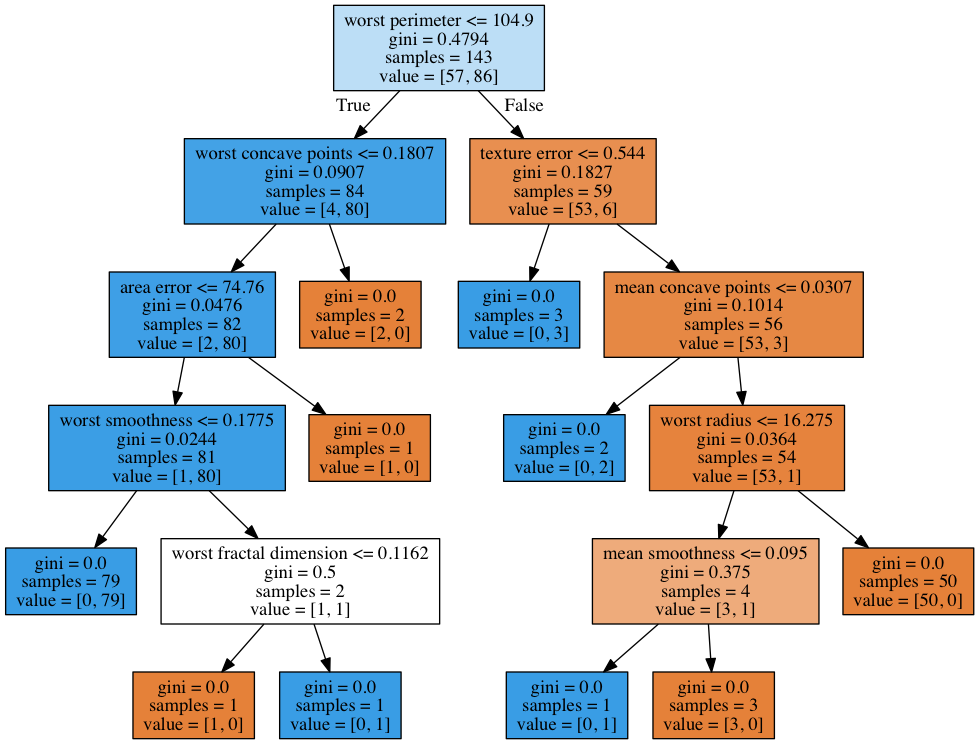

In [41]:
graph = print_tree(dtc, features = cols)
Image(graph.create_png())

In [42]:
pipe_1 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_2 = make_pipeline(StandardScaler(), BaggingClassifier())
pipe_1.fit(X_train, y_train)
pipe_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('baggingclassifier', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))])

In [43]:
print 'Decision Tree Classifier: ', pipe_1.score(X_test, y_test)

Decision Tree Classifier:  0.922535211268


In [44]:
print 'Baggin Classifier: ', pipe_2.score(X_test, y_test)

Baggin Classifier:  0.915492957746


### 1.b Scaled pipelines
As you may have noticed the features are not normalized. Do the score improve with normalization?
By now you should be very familiar with pipelines and scaling, so:

1. Create 2 pipelines, with a scaling preprocessing step and then either a decision tree or a bagging decision tree.
- Which score is better? Are the score significantly different? How can you judge that?
- Are the scores different from the non-scaled data?

### 1.c Grid Search

Grid search is a great way to improve the performance of a classifier. Let's explore the parameter space of both models and see if we can improve their performance.

1. Initialize a GridSearchCV with 5-fold cross validation for the Decision Tree Classifier
- search for few values of the parameters in order to improve the score of the classifier
- Use the whole X, y dataset for your test
- Check the best\_score\_ once you've trained it. Is it better than before?
- How does the score of the Grid-searched DT compare with the score of the Bagging DT?
- Initialize a GridSearchCV with 5-fold cross validation for the Bagging Decision Tree Classifier
- Repeat the search
    - Note that you'll have to change parameter names for the base_estimator
    - Note that there are also additional parameters to change
    - Note that you may end up with a grid space to large to search in a short time
    - Make use of the n_jobs parameter to speed up your grid search
- Does the score improve for the Grid-searched Bagging Classifier?
- Which score is better? Are the score significantly different? How can you judge that?

In [47]:
# param_grid = {'max_depth': [3, 5, 10, 20],
#               'max_features': [None, 'auto'],
#          'min_samples_leaf': [1, 3, 5, 7, 10],
#          'min_samples_split': [2, 5, 7]}
# n_estimators

In [51]:
# gs = GridSearchCV(bdt, n_jobs=-1, cv = 5)
# gs.fit(X, y) trt

## 2 Diabetes and Regression

Scikit Learn has a dataset of diabetic patients obtained from this study:

http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

442 diabetes patients were measured on 10 baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements.

The target is a quantitative measure of disease progression one year after baseline.

Repeat the above comparison between a DecisionTreeRegressor and a Bagging version of the same.

### 2.a Simple comparison
1. Load the data and create X and y
- Initialize a Decision Tree Regressor and use cross_val_score to evaluate it's performance. Set crossvalidation to 5-folds. Which score will you use?
- Wrap a Bagging Regressor around the Decision Tree Regressor and use cross_val_score to evaluate it's performance. Set crossvalidation to 5-folds. 
- Which score is better? Are the score significantly different? How can you judge that?

### 2.b Grid Search

Repeat Grid search as above:

1. Initialize a GridSearchCV with 5-fold cross validation for the Decision Tree Regressor
- Search for few values of the parameters in order to improve the score of the regressor
- Use the whole X, y dataset for your test
- Check the best\_score\_ once you've trained it. Is it better than before?
- How does the score of the Grid-searched DT compare with the score of the Bagging DT?
- Initialize a GridSearchCV with 5-fold cross validation for the Bagging Decision Tree Regressor
- Repeat the search
    - Note that you'll have to change parameter names for the base_estimator
    - Note that there are also additional parameters to change
    - Note that you may end up with a grid space to large to search in a short time
    - Make use of the n_jobs parameter to speed up your grid search
- Does the score improve for the Grid-searched Bagging Regressor?
- Which score is better? Are the score significantly different? How can you judge that?


## Bonus: Project 6 data

Repeat the analysis for the Project 6 Dataset